<a href="https://colab.research.google.com/github/codebybishwa/Stock-Price-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
!pip install yfinance
import yfinance as yf

# Get the stock data
df = yf.download('AAPL', start='2012-01-01', end='2023-12-17')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402626,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469278,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607713,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739513,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719303,394024400
...,...,...,...,...,...,...
2023-12-11,193.110001,193.490005,191.419998,193.179993,192.449722,60943700
2023-12-12,193.080002,194.720001,191.720001,194.710007,193.973953,52696900
2023-12-13,195.089996,198.000000,194.850006,197.960007,197.211655,70404200


In [8]:
df.shape

(3009, 6)

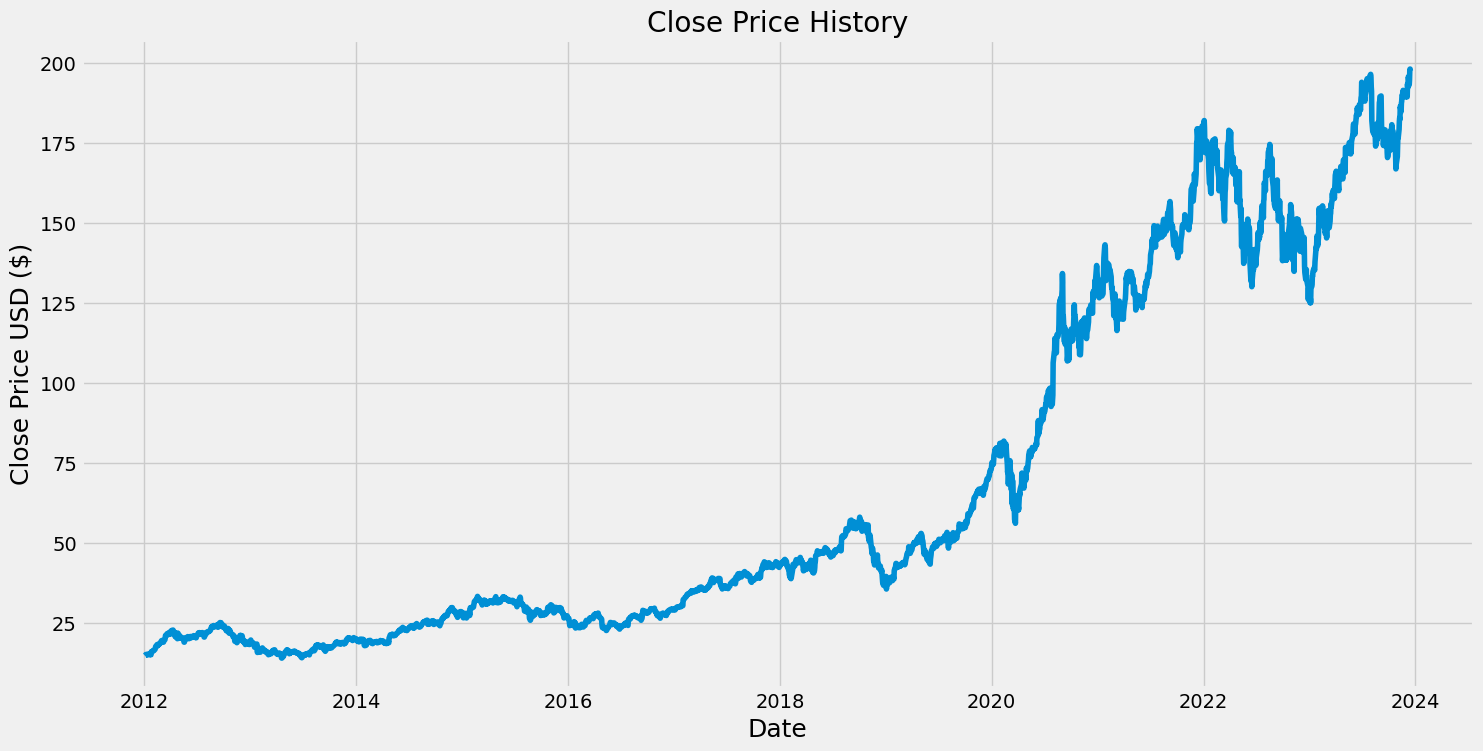

In [9]:
# Visualizing the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [10]:
# Creating a new dataframe with only the Close Column
data = df.filter(['Close'])
# Converting the dataframe to a numpy array
dataset = data.values
# Get / Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)

training_data_len

2408

In [11]:
  # Scale the data
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(dataset)
  scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.99918554],
       [1.        ],
       [0.99706784]])

In [12]:
# Creating the training and scaled training data set
train_data = scaled_data[0:training_data_len, :]
# Spliting the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()


[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]



In [13]:
# Converting the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
# Reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2348, 60, 1)

In [15]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
# Training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2348/2348 ━━━━━━━━━━━━━━━━━━━━ 72s 29ms/step - loss: 0.0014


In [19]:
# Spliting the data into 80% training and 20% testing
train_data_len = int(len(dataset) * 0.8)

# creating the testing dataset
test_data = scaled_data[train_data_len - 60: , :]
# Creating the x_test and y_test data sets
x_test = []
y_test = dataset[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Converting the x_test and y_test data sets to numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

In [20]:
# Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
# Get the models predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [22]:
# Getting the root mean squared error (RMSE)
rsme = np.sqrt(np.mean(((predictions - y_test)**2)))
rsme

4.9355575791587825

<ipython-input-23-8853511049e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


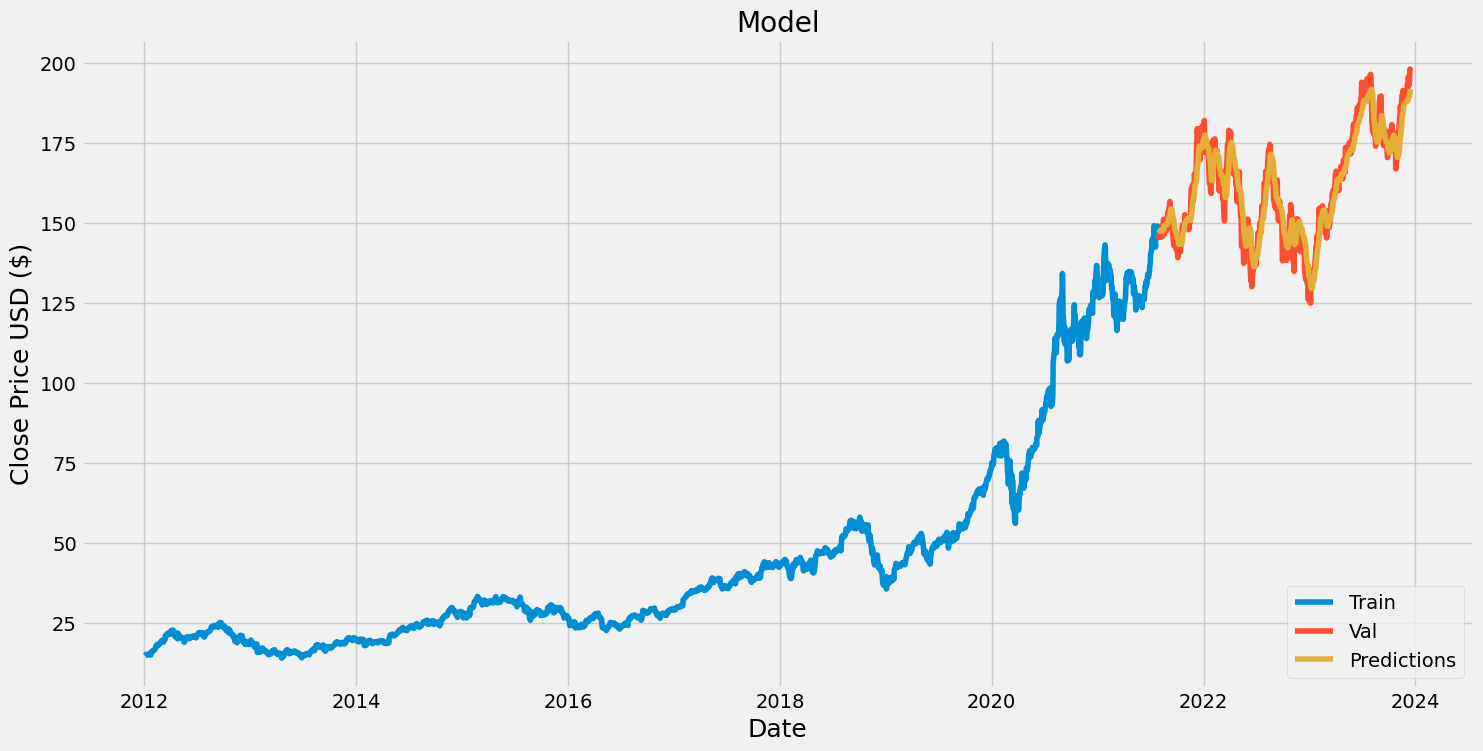

In [23]:
# Plot the data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions

# Visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [24]:
# Showing the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-07-28,144.979996,148.081940
2021-07-29,145.639999,148.017899
2021-07-30,145.860001,147.876419
2021-08-02,145.520004,147.717331
2021-08-03,147.360001,147.529037
...,...,...
2023-12-11,193.179993,189.586670
2023-12-12,194.710007,190.006134
2023-12-13,197.960007,190.436386


In [28]:
!pip install yfinance
import yfinance as yf

# Get the quote
apple_quote = yf.download('AAPL', start='2012-01-01', end='2023-12-17')
# Create a new dataframe
new_df = apple_quote.filter(['Close'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[192.50499]]
